#### 简单的分类神经网络

In [1]:
import torch
import torch.nn as nn
import torchsummary
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_tensor_1 = torch.rand(100,2)*10
input_tensor_1
input_tensor_2 = -input_tensor_1
input_tensor_2
input_tensor = torch.cat((input_tensor_1, input_tensor_2), 0).type(torch.FloatTensor)
print(input_tensor.shape)

torch.Size([200, 2])


In [3]:
target_1 = torch.ones(100,1)
target_2 = torch.zeros(100,1)
target = torch.cat((target_1, target_2), 0).type(torch.LongTensor).squeeze()
print(target.shape)

torch.Size([200])


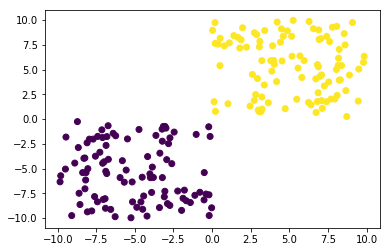

In [4]:
plt.scatter(input_tensor.data.numpy()[:,0], input_tensor.data.numpy()[:,1], c=target.data.numpy())

In [5]:
class Net(torch.nn.Module):
    def __init__(self, input_ch, middle_ch, out_ch):
        super().__init__()
        self.hidden = nn.Linear(input_ch, middle_ch, bias=True)
        self.predict = nn.Linear(middle_ch, out_ch, bias=True)
    
    def forward(self,x):
        x = self.hidden(x)
        x = self.predict(x)
        return x

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


Text(1.5, -4, 'Accuracy=0.00')

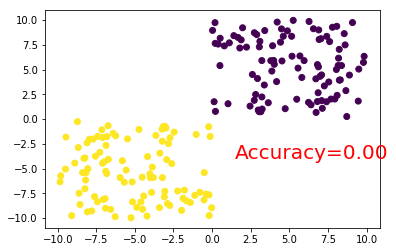

In [15]:
model = Net(2,10,2)
print(model)
model.eval()
out = model(input_tensor)
prediction = torch.max(torch.nn.functional.softmax(out), 1)[1]
pred_y = prediction.data.numpy().squeeze()

target_y = target.data.numpy()
accuracy = sum(pred_y == target_y)/200
plt.scatter(input_tensor.data.numpy()[:,0], input_tensor.data.numpy()[:,1], c=pred_y)
plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})

In [141]:
input_size = (2,)
torchsummary.summary(model, input_size=input_size, batch_size=2)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [2, 10]              30
            Linear-2                     [2, 2]              22
Total params: 52
Trainable params: 52
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [11]:
from torch.utils.data import TensorDataset, DataLoader
print("input:\t", input_tensor.size())
print("target:\t", target.size())
train_ds = TensorDataset(input_tensor, target)

input:	 torch.Size([200, 2])
target:	 torch.Size([200])


In [12]:
train_lo = DataLoader(train_ds, batch_size=2, shuffle=True)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


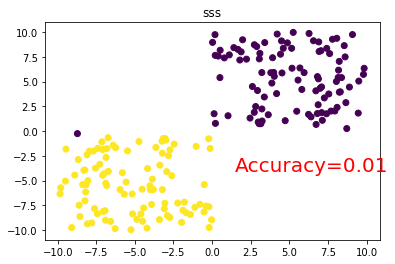

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


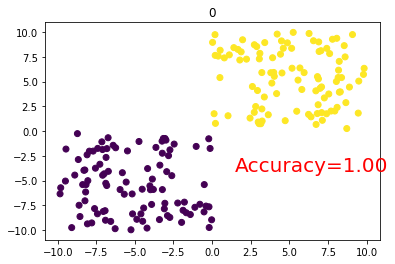

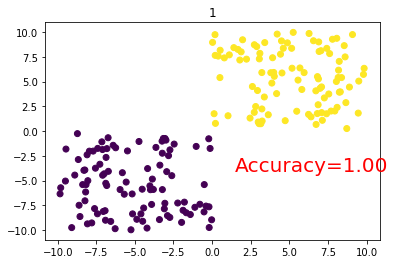

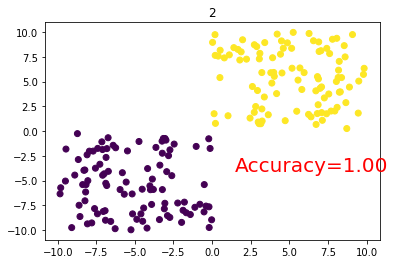

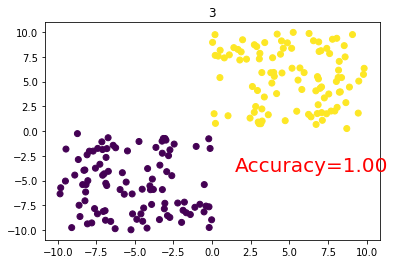

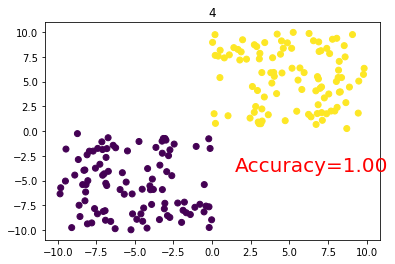

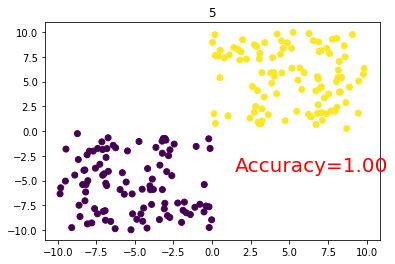

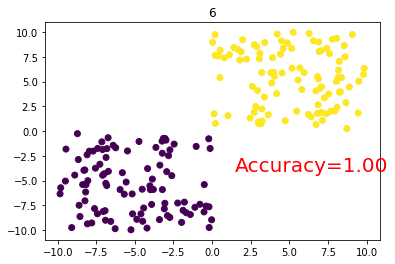

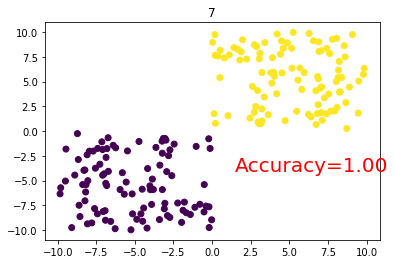

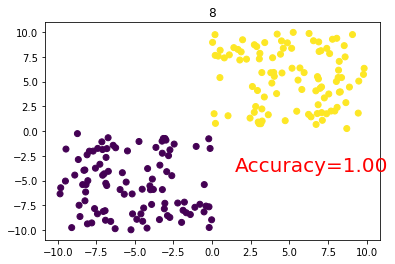

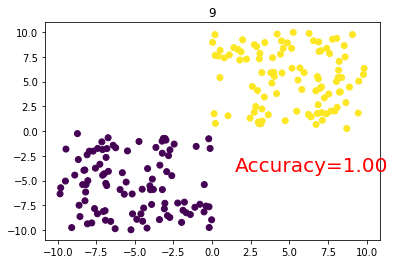

In [13]:
loss_fn = torch.nn.functional.cross_entropy
lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model.eval()
out = model(input_tensor)
prediction = torch.max(torch.nn.functional.softmax(out), 1)[1]
pred_y = prediction.data.numpy().squeeze()

target_y = target.data.numpy()
accuracy = sum(pred_y == target_y)/200
plt.figure("sss")
plt.title("sss")
plt.scatter(input_tensor.data.numpy()[:,0], input_tensor.data.numpy()[:,1], c=pred_y)
plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
plt.show()

for epoch in range(10):
    model.train()
    for data in train_lo:
        x, y = data
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        
    model.eval()
    out = model(input_tensor)
    prediction = torch.max(torch.nn.functional.softmax(out), 1)[1]
    pred_y = prediction.data.numpy().squeeze()
    
    target_y = target.data.numpy()
    accuracy = sum(pred_y == target_y)/200
    plt.figure("{}".format(epoch))
    plt.title("{}".format(epoch))
    plt.scatter(input_tensor.data.numpy()[:,0], input_tensor.data.numpy()[:,1], c=pred_y)
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.show()